In [122]:
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.snowball import SnowballStemmer
import nltk
import re
import string
import numpy as np
import spacy
import pandas as pd
from fuzzywuzzy import fuzz

nlp = spacy.load('en_core_web_lg')

df = pd.read_csv('./scraper/archive/react-useeffect.csv', names=["POSTID", "POSTLINK", "POSTTITLE", "POSTBODY", "POSTDATE", "POSTVOTECOUNTS", "COMMENTID", "COMMENTSCORE", "COMMENTUSERNAME", "COMMENTTEXT", "COMMENTDATETIME", "ANSWERID", "ANSWERTEXT", "ANSWERBODY", "ANSWERDATETIME", "ANSWERVOTECOUNTS", "ANSWERCMTID", "ANSWERCMTTEXT", "ANSWERCMTBODY", "ANSWERCMTDATETIME", "ANSWERCMTVOTECOUNTS" , "TYPE"])
query = 'Useeffect hook rerenders infinitely'

display(df.head())

,POSTID,POSTLINK,POSTTITLE,POSTBODY,POSTDATE,POSTVOTECOUNTS,COMMENTID,COMMENTSCORE,COMMENTUSERNAME,COMMENTTEXT,...,ANSWERTEXT,ANSWERBODY,ANSWERDATETIME,ANSWERVOTECOUNTS,ANSWERCMTID,ANSWERCMTTEXT,ANSWERCMTBODY,ANSWERCMTDATETIME,ANSWERCMTVOTECOUNTS,TYPE
0,75130904,https://stackoverflow.com/questions/75130904/h...,How to avoid a small delay in scrolling on rea...,\n \n<p>I have a component that...,"('2023-01-16 06:36:31Z',)","('2',)",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,post
1,75130904,https://stackoverflow.com/questions/75130904/h...,How to avoid a small delay in scrolling on rea...,\n \n<p>I have a component that...,"('2023-01-16 06:36:31Z',)","('2',)",NaN,NaN,NaN,NaN,...,"It sounds like you may need: useLayoutEffect, ...","('\n<p>It sounds like you may need: <a href=""...","2023-01-16 07:38:44Z, License: CC BY-SA 4.0","('2',)",NaN,NaN,NaN,NaN,NaN,answer
2,75130904,https://stackoverflow.com/questions/75130904/h...,How to avoid a small delay in scrolling on rea...,\n \n<p>I have a component that...,"('2023-01-16 06:36:31Z',)","('2',)",NaN,NaN,NaN,NaN,...,"It sounds like you may need: useLayoutEffect, ...","('\n<p>It sounds like you may need: <a href=""...","2023-01-16 07:38:44Z, License: CC BY-SA 4.0","('2',)","('132582008',)",it works! thank you! never used useLayoutEffec...,('\n \n <span cl...,14 hours ago,"('',)",answer_comment
3,75122338,https://stackoverflow.com/questions/75122338/r...,React useEffect called twice even with strict ...,\n \n<p>I'm new to React and am...,"('2023-01-15 01:01:27Z',)","('1',)",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,post
4,75122338,https://stackoverflow.com/questions/75122338/r...,React useEffect called twice even with strict ...,\n \n<p>I'm new to React and am...,"('2023-01-15 01:01:27Z',)","('1',)",comment-132566773,NaN,segFault,"You might just be missing a dependency array, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,post_comment


In [123]:
ALL_COLS = ["POSTID", "POSTLINK", "POSTTITLE", "POSTBODY", "POSTDATE", "POSTVOTECOUNTS", "COMMENTID", "COMMENTSCORE", "COMMENTUSERNAME", "COMMENTTEXT", "COMMENTDATETIME", "ANSWERID", "ANSWERTEXT", "ANSWERBODY", "ANSWERDATETIME", "ANSWERVOTECOUNTS", "ANSWERCMTID", "ANSWERCMTTEXT", "ANSWERCMTBODY", "ANSWERCMTDATETIME", "ANSWERCMTVOTECOUNTS" , "TYPE"]

dPOST  = pd.DataFrame(columns=ALL_COLS)
dPOST = df.copy();
dPOST = dPOST.drop(columns=['COMMENTID', 'COMMENTSCORE', 'COMMENTUSERNAME', 'COMMENTTEXT', 'COMMENTDATETIME', 'ANSWERID', 'ANSWERTEXT', 'ANSWERBODY', 'ANSWERDATETIME', 'ANSWERVOTECOUNTS', 'ANSWERCMTID', 'ANSWERCMTTEXT', 'ANSWERCMTBODY', 'ANSWERCMTDATETIME', 'ANSWERCMTVOTECOUNTS'])
# drop if type is not post
dPOST = dPOST[dPOST['TYPE'] == 'post']
display(dPOST.head(3))

dfPC = pd.DataFrame(columns=ALL_COLS)
dfPC = df.copy();
dfPC = dfPC.drop(columns=['ANSWERID', 'ANSWERTEXT', 'ANSWERBODY', 'ANSWERDATETIME', 'ANSWERVOTECOUNTS', 'ANSWERCMTID', 'ANSWERCMTTEXT', 'ANSWERCMTBODY', 'ANSWERCMTDATETIME', 'ANSWERCMTVOTECOUNTS'])
# drop if type is not post
dfPC = dfPC[dfPC['TYPE'] == 'post_comment']
display(dfPC.head(3))

dfA = pd.DataFrame(columns=ALL_COLS)
dfA = df.copy();
dfA = dfA.drop(columns=['POSTLINK', 'POSTBODY', 'POSTDATE', 'POSTVOTECOUNTS', 'COMMENTID', 'COMMENTSCORE', 'COMMENTUSERNAME', 'COMMENTTEXT', 'COMMENTDATETIME', 'ANSWERCMTID', 'ANSWERCMTTEXT', 'ANSWERCMTBODY', 'ANSWERCMTDATETIME', 'ANSWERCMTVOTECOUNTS'])

dfAAC = dfA[dfA['TYPE'] == 'answer']
display(dfAAC.head(3))

dFAC = pd.DataFrame(columns=ALL_COLS)
dFAC = df.copy();
dFAC = dFAC.drop(columns=['POSTLINK', 'POSTBODY', 'POSTDATE', 'POSTVOTECOUNTS', 'COMMENTID', 'COMMENTSCORE', 'COMMENTUSERNAME', 'COMMENTTEXT', 'COMMENTDATETIME', 'ANSWERTEXT', 'ANSWERBODY', 'ANSWERDATETIME', 'ANSWERVOTECOUNTS'])
dFACT = dFAC[dFAC['TYPE'] == 'answer_comment']
display(dFACT.head(3))

,POSTID,POSTLINK,POSTTITLE,POSTBODY,POSTDATE,POSTVOTECOUNTS,TYPE
0,75130904,https://stackoverflow.com/questions/75130904/h...,How to avoid a small delay in scrolling on rea...,\n \n<p>I have a component that...,"('2023-01-16 06:36:31Z',)","('2',)",post
3,75122338,https://stackoverflow.com/questions/75122338/r...,React useEffect called twice even with strict ...,\n \n<p>I'm new to React and am...,"('2023-01-15 01:01:27Z',)","('1',)",post
11,75118187,https://stackoverflow.com/questions/75118187/r...,React useEffect not triggered on element clien...,\n \n<p>I have a component with...,"('2023-01-14 13:12:48Z',)","('1',)",post


,POSTID,POSTLINK,POSTTITLE,POSTBODY,POSTDATE,POSTVOTECOUNTS,COMMENTID,COMMENTSCORE,COMMENTUSERNAME,COMMENTTEXT,COMMENTDATETIME,TYPE
4,75122338,https://stackoverflow.com/questions/75122338/r...,React useEffect called twice even with strict ...,\n \n<p>I'm new to React and am...,"('2023-01-15 01:01:27Z',)","('1',)",comment-132566773,NaN,segFault,"You might just be missing a dependency array, ...","2023-01-15 01:10:53Z, License: CC BY-SA 4.0",post_comment
12,75118187,https://stackoverflow.com/questions/75118187/r...,React useEffect not triggered on element clien...,\n \n<p>I have a component with...,"('2023-01-14 13:12:48Z',)","('1',)",comment-132559365,NaN,Sergey Sosunov,Does this answer your question? Detect element...,"2023-01-14 13:19:20Z, License: CC BY-SA 4.0",post_comment
13,75118187,https://stackoverflow.com/questions/75118187/r...,React useEffect not triggered on element clien...,\n \n<p>I have a component with...,"('2023-01-14 13:12:48Z',)","('1',)",comment-132559388,NaN,Sergey Sosunov,Or this one useEffect without deps array. You ...,"2023-01-14 13:22:20Z, License: CC BY-SA 4.0",post_comment


,POSTID,POSTTITLE,ANSWERID,ANSWERTEXT,ANSWERBODY,ANSWERDATETIME,ANSWERVOTECOUNTS,TYPE
1,75130904,How to avoid a small delay in scrolling on rea...,75131129.0,"It sounds like you may need: useLayoutEffect, ...","('\n<p>It sounds like you may need: <a href=""...","2023-01-16 07:38:44Z, License: CC BY-SA 4.0","('2',)",answer
5,75122338,React useEffect called twice even with strict ...,75122385.0,The issue here is that the useEffect hook is m...,('\n<p>The issue here is that the <code>useEff...,"2023-01-15 02:00:46Z, License: CC BY-SA 4.0","('4',)",answer
19,75114654,socket.io fires event twice in react useEffect...,75114744.0,"""the only way this useEffect hook render once ...","('\n<p>""the only way this useEffect hook rende...","2023-01-14 06:16:44Z, License: CC BY-SA 4.0","('1',)",answer


,POSTID,POSTTITLE,ANSWERID,ANSWERCMTID,ANSWERCMTTEXT,ANSWERCMTBODY,ANSWERCMTDATETIME,ANSWERCMTVOTECOUNTS,TYPE
2,75130904,How to avoid a small delay in scrolling on rea...,75131129.0,"('132582008',)",it works! thank you! never used useLayoutEffec...,('\n \n <span cl...,14 hours ago,"('',)",answer_comment
6,75122338,React useEffect called twice even with strict ...,75122385.0,"('132567007',)","updating the dependency may resolve the issue,...",('\n \n <span cl...,yesterday,"('',)",answer_comment
7,75122338,React useEffect called twice even with strict ...,75122385.0,"('132567065',)",@Shah fetchWeekly is an async function and it'...,('\n \n <span cl...,yesterday,"('1',)",answer_comment


# Explanatory Analysis

#### Clean out noisy values

In [124]:
import warnings
warnings.filterwarnings('ignore')

dPOST['POSTVOTECOUNTS'] = dPOST['POSTVOTECOUNTS'].str.replace(r"(", '')
dPOST['POSTVOTECOUNTS'] = dPOST['POSTVOTECOUNTS'].str.replace(r")", '')
dPOST['POSTVOTECOUNTS'] = dPOST['POSTVOTECOUNTS'].str.replace(r"'", '')
dPOST['POSTVOTECOUNTS'] = dPOST['POSTVOTECOUNTS'].str.replace(r",", '')

dPOST['POSTDATE'] = dPOST['POSTDATE'].str.replace(r"(", '')
dPOST['POSTDATE'] = dPOST['POSTDATE'].str.replace(r")", '')
dPOST['POSTDATE'] = dPOST['POSTDATE'].str.replace(r"'", '')
dPOST['POSTDATE'] = dPOST['POSTDATE'].str.replace(r",", '')
display(dPOST.head(1))

dfPC['POSTVOTECOUNTS'] = dfPC['POSTVOTECOUNTS'].str.replace(r"(", '')
dfPC['POSTVOTECOUNTS'] = dfPC['POSTVOTECOUNTS'].str.replace(r")", '')
dfPC['POSTVOTECOUNTS'] = dfPC['POSTVOTECOUNTS'].str.replace(r"'", '')
dfPC['POSTVOTECOUNTS'] = dfPC['POSTVOTECOUNTS'].str.replace(r",", '')

dfPC['POSTDATE'] = dfPC['POSTDATE'].str.replace(r"(", '')
dfPC['POSTDATE'] = dfPC['POSTDATE'].str.replace(r")", '')
dfPC['POSTDATE'] = dfPC['POSTDATE'].str.replace(r"'", '')
dfPC['POSTDATE'] = dfPC['POSTDATE'].str.replace(r",", '')
dfPC['POSTDATE'] = dfPC['POSTDATE'].str.replace(r",", '')
dfPC['COMMENTDATETIME'] = dfPC['COMMENTDATETIME'].str.replace(r", License: CC BY-SA 4.0", '')
dfPC['COMMENTUSERNAME'] = dfPC['COMMENTUSERNAME'].str.replace(r"segFault", " ")
display(dfPC.head(1))

dfAAC['ANSWERVOTECOUNTS'] = dfAAC['ANSWERVOTECOUNTS'].str.replace(r"(", '')
dfAAC['ANSWERVOTECOUNTS'] = dfAAC['ANSWERVOTECOUNTS'].str.replace(r")", '')
dfAAC['ANSWERVOTECOUNTS'] = dfAAC['ANSWERVOTECOUNTS'].str.replace(r"'", '')
dfAAC['ANSWERVOTECOUNTS'] = dfAAC['ANSWERVOTECOUNTS'].str.replace(r",", '')

dfAAC['ANSWERDATETIME'] = dfAAC['ANSWERDATETIME'].str.replace(r", License: CC BY-SA 4.0", '')
display(dfAAC.head(1))

dFACT['ANSWERCMTVOTECOUNTS'] = dFACT['ANSWERCMTVOTECOUNTS'].str.replace(r"(", '')
dFACT['ANSWERCMTVOTECOUNTS'] = dFACT['ANSWERCMTVOTECOUNTS'].str.replace(r")", '')
dFACT['ANSWERCMTVOTECOUNTS'] = dFACT['ANSWERCMTVOTECOUNTS'].str.replace(r"'", '')
dFACT['ANSWERCMTVOTECOUNTS'] = dFACT['ANSWERCMTVOTECOUNTS'].str.replace(r",", '')

dFACT['ANSWERCMTID'] = dFACT['ANSWERCMTID'].str.replace(r"(", '')
dFACT['ANSWERCMTID'] = dFACT['ANSWERCMTID'].str.replace(r")", '')
dFACT['ANSWERCMTID'] = dFACT['ANSWERCMTID'].str.replace(r"'", '')
dFACT['ANSWERCMTID'] = dFACT['ANSWERCMTID'].str.replace(r",", '')
display(dFACT.head(1))

,POSTID,POSTLINK,POSTTITLE,POSTBODY,POSTDATE,POSTVOTECOUNTS,TYPE
0,75130904,https://stackoverflow.com/questions/75130904/h...,How to avoid a small delay in scrolling on rea...,\n \n<p>I have a component that...,2023-01-16 06:36:31Z,2,post


,POSTID,POSTLINK,POSTTITLE,POSTBODY,POSTDATE,POSTVOTECOUNTS,COMMENTID,COMMENTSCORE,COMMENTUSERNAME,COMMENTTEXT,COMMENTDATETIME,TYPE
4,75122338,https://stackoverflow.com/questions/75122338/r...,React useEffect called twice even with strict ...,\n \n<p>I'm new to React and am...,2023-01-15 01:01:27Z,1,comment-132566773,NaN,,"You might just be missing a dependency array, ...",2023-01-15 01:10:53Z,post_comment


,POSTID,POSTTITLE,ANSWERID,ANSWERTEXT,ANSWERBODY,ANSWERDATETIME,ANSWERVOTECOUNTS,TYPE
1,75130904,How to avoid a small delay in scrolling on rea...,75131129.0,"It sounds like you may need: useLayoutEffect, ...","('\n<p>It sounds like you may need: <a href=""...",2023-01-16 07:38:44Z,2,answer


,POSTID,POSTTITLE,ANSWERID,ANSWERCMTID,ANSWERCMTTEXT,ANSWERCMTBODY,ANSWERCMTDATETIME,ANSWERCMTVOTECOUNTS,TYPE
2,75130904,How to avoid a small delay in scrolling on rea...,75131129.0,132582008,it works! thank you! never used useLayoutEffec...,('\n \n <span cl...,14 hours ago,,answer_comment


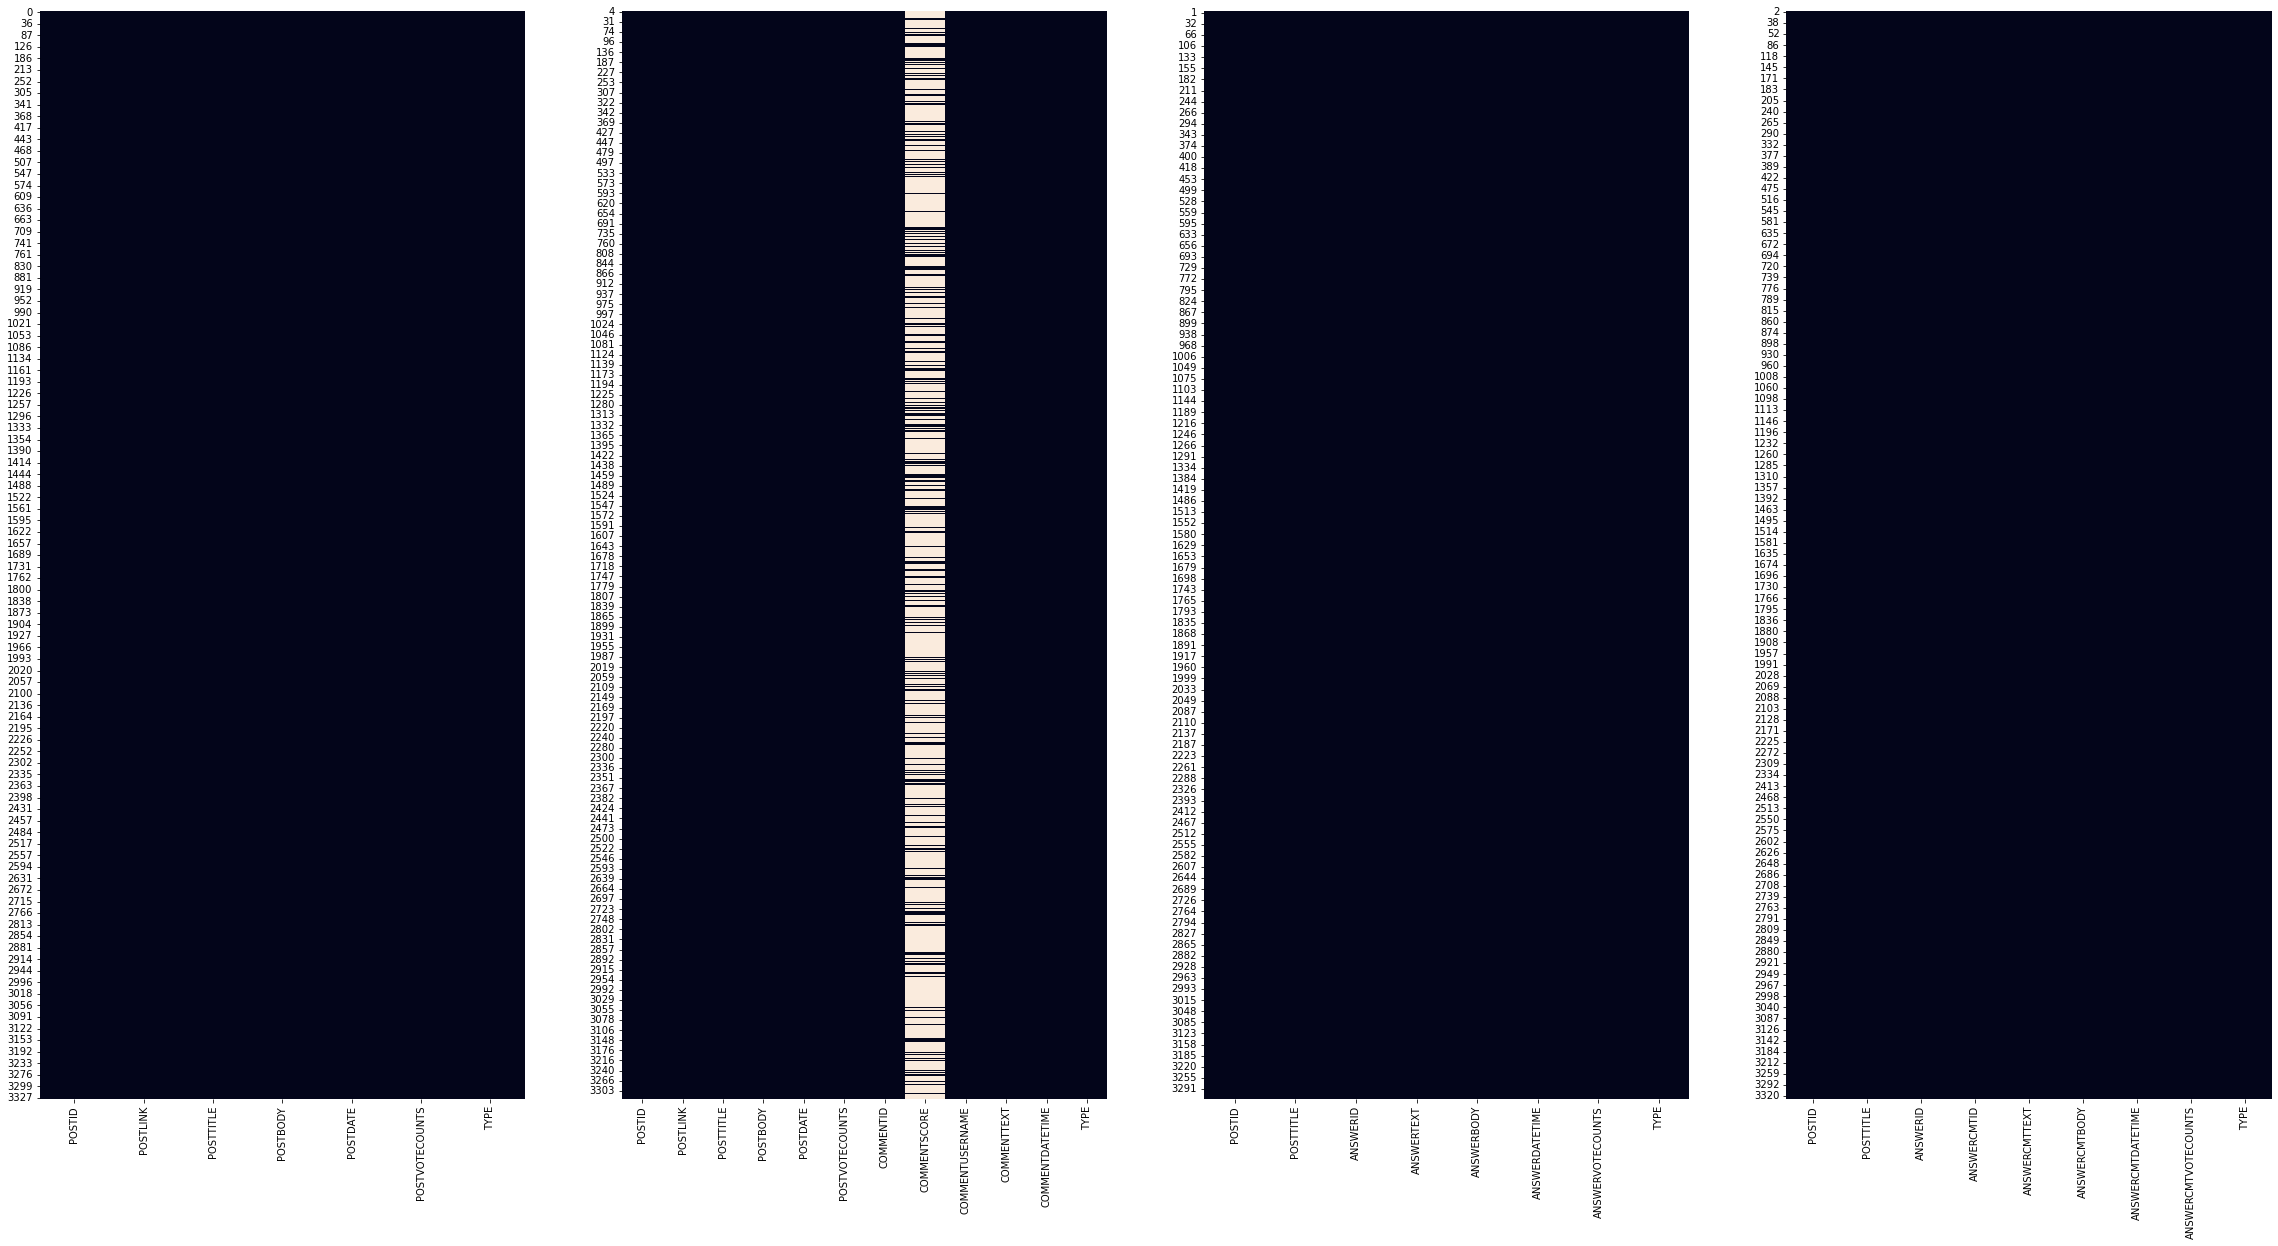

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
#plot all 4 plots horizontally
fig, axs = plt.subplots(1, 4, figsize=(40, 20))
sns.heatmap(dPOST.isnull(), cbar=False, ax=axs[0])
sns.heatmap(dfPC.isnull(), cbar=False, ax=axs[1])
sns.heatmap(dfAAC.isnull(), cbar=False, ax=axs[2])
sns.heatmap(dFACT.isnull(), cbar=False, ax=axs[3])
plt.show()

<AxesSubplot:xlabel='ANSWERVOTECOUNTS', ylabel='Density'>

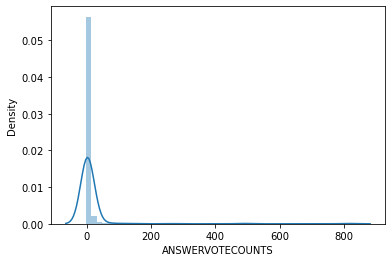

In [126]:
# show vote count distribution
sns.distplot(dfAAC['ANSWERVOTECOUNTS'])

In [127]:
# reset warnings
warnings.resetwarnings()

In [128]:
def calPartialRatio (str1, str2):
    return fuzz.partial_ratio(str1, str2)

def calTokenSortRatio (str1, str2):
    return fuzz.token_sort_ratio(str1, str2)

### 1. String similarity to find related post

In [129]:
# get all unique values in column 3
unique_values = df['POSTTITLE'].unique()
print("There are a total of {} unique titles".format(len(unique_values)))

There are a total of 659 unique titles


#### 1.1 Fuzzy Wuzzy

In [130]:
fuzzywuzzy_df = pd.DataFrame(columns=['postId', 'title', 'partial_ratio', 'token_sort_ratio'])
for unique_value in unique_values:
    # find the postId of the unique value
    postId = df[df['POSTTITLE'] == unique_value]['POSTID'].tolist()[0]
    fuzzywuzzy_df = pd.concat([fuzzywuzzy_df, pd.DataFrame({'postId': postId , 'title': unique_value, 'partial_ratio': calPartialRatio(unique_value, query), 'token_sort_ratio': calTokenSortRatio(unique_value, query)}, index=[0])], )

matchesPR = fuzzywuzzy_df.sort_values(by=['partial_ratio'], ascending=False)
matchesPR = matchesPR[matchesPR['partial_ratio'] > 50]

matchesTS = fuzzywuzzy_df.sort_values(by=['token_sort_ratio'], ascending=False)
matchesTS = matchesTS[matchesTS['token_sort_ratio'] > 50]

Top10MathesMerged = pd.concat([matchesTS, matchesPR]).drop_duplicates()
Top10MathesMerged['average'] = (Top10MathesMerged['token_sort_ratio'] + Top10MathesMerged['partial_ratio']) / 2
Top10MathesMerged = Top10MathesMerged.sort_values(by=['average'], ascending=False)

display(Top10MathesMerged)

,postId,title,partial_ratio,token_sort_ratio,average
0,73534338,React UseEffect render infinite loop,77,79,78.0
0,64651759,react useEffect hook causes infinite loop,71,71,71.0
0,58557877,React useEffect hook infinity loop,62,75,68.5
0,65558836,React useEffect hook is causing infinite loop,69,68,68.5
0,71835956,React UseEffect hook Issue Rendering an Interval,66,70,68.0
...,...,...,...,...,...
0,75100399,Listen localStorage in react(useEffect),31,52,41.5
0,67948692,Trigger react useEffect,30,52,41.0
0,71743687,react useEffect how to update data if two diff...,51,28,39.5
0,69724536,How to write a Jest-enzyme test case for code ...,54,24,39.0


#### 1.2 Bag of words approach (https://stackoverflow.com/questions/51623595/better-approach-than-fuzzywuzzy)

In [131]:
bag_words_df = pd.DataFrame(columns=['postId', 'title', 'score'])

def myScore(lst1, lst2):
    c = sum(el in lst1 for el in lst2)
    if (len(lst1) == 0 or len(lst2) == 0):
        retval = 0.0
    else:
        retval = 0.5 * (c/len(lst1) + c/len(lst2))

    return retval

query_tokenized = nltk.word_tokenize(query)

for unique_value in unique_values:
    postId = df[df['POSTTITLE'] == unique_value]['POSTID'].tolist()[0]
    bag_words_df = pd.concat([bag_words_df, pd.DataFrame({'postId': postId , 'title': unique_value, 'score': myScore(nltk.word_tokenize(unique_value), query_tokenized)}, index=[0])], )

TopMatchesBOW = bag_words_df.sort_values(by=['score'], ascending=False)
TopMatchesBOW = TopMatchesBOW[TopMatchesBOW['score'] > 0.5]
display(TopMatchesBOW)

,postId,title,score


#### 1.3 Spacy Similarity (https://stackoverflow.com/questions/52113939/spacy-strange-similarity-between-two-sentences)

In [132]:
spacy_sim = pd.DataFrame(columns=['postId', 'title', 'score'])
search_doc_no_stop_words = nlp(query)

for unique_value in unique_values:
    postId = df[df['POSTTITLE'] == unique_value]['POSTID'].tolist()[0]
    spacy_sim = pd.concat([spacy_sim, pd.DataFrame({'postId': postId , 'title': unique_value, 'score': search_doc_no_stop_words.similarity(nlp(unique_value))}, index=[0])], )

TopMatchesSpacy = spacy_sim.sort_values(by=['score'], ascending=False)
TopMatchesSpacy = TopMatchesSpacy[TopMatchesSpacy['score'] > 0.5]
display(TopMatchesSpacy)

,postId,title,score
0,58557877,React useEffect hook infinity loop,0.782165
0,64651759,react useEffect hook causes infinite loop,0.728888
0,60984978,React useeffect hook,0.696022
0,60112511,Setting hook state inside React useEffect hook,0.682884
0,63800700,react useEffect hook cleanup,0.673840
0,57772851,React useEffect hook load onsnapshot condition...,0.666406
0,71032390,React useEffect hook dependency array,0.648506
0,71357152,React useEffect hook running infinite loop des...,0.646135
0,56914826,Using react useEffect hook,0.642261
0,68008264,React useEffect fetch hook makes endless calls...,0.632083


After testing, we observed that 
1. If the query is short and abstract, The fuzzy wuzzy method gives us a more accurate score
2. In the contradictary, if the query is long and comprehensive, The spacy similarity method gives a more accurate score

# Beginning of Idea A

In [72]:
class GroupedComments: 
    def __init__(self, title, post, post_comments, answers, answer_comments): 
        self.title = title
        self.post = post
        self.post_comments = post_comments
        self.answers = answers
        self.answer_comments = answer_comments
        

def grouping(titleArr): 
    grouped = []
    for title in titleArr:
        post = dPOST[dPOST['POSTTITLE'].str.contains(title)]
        post_comments = dfPC[dfPC['POSTTITLE'].str.contains(title)]
        answers = dfAAC[dfAAC['POSTTITLE'].str.contains(title)]
        answer_comments = dFACT[dFACT['POSTTITLE'].str.contains(title)]
        grouped.append(GroupedComments(title, post, post_comments, answers, answer_comments))
    return grouped 

allcommentsGrouped = grouping(Top10MatchesTS['title'].tolist())
print(allcommentsGrouped[1].title)

display(allcommentsGrouped[1].post_comments)
display(allcommentsGrouped[1].answers)
display(allcommentsGrouped[1].answer_comments)

React useEffect() Infinite loop


,POSTID,POSTLINK,POSTTITLE,POSTBODY,POSTDATE,POSTVOTECOUNTS,COMMENTID,COMMENTSCORE,COMMENTUSERNAME,COMMENTTEXT,COMMENTDATETIME,TYPE


,POSTID,POSTTITLE,ANSWERID,ANSWERTEXT,ANSWERBODY,ANSWERDATETIME,ANSWERVOTECOUNTS,TYPE
1258,70257707,React useEffect Infinite loop when fetching fr...,70257794.0,If you use async/await you don't need to chain...,('\n<p>If you use <code>async/await</code> you...,2021-12-07 09:42:04Z,2,answer
1264,70257707,React useEffect Infinite loop when fetching fr...,70258002.0,mostly I try to call function inside useEffect...,('\n<p>mostly I try to call function inside us...,2021-12-07 09:56:27Z,1,answer
1266,70257707,React useEffect Infinite loop when fetching fr...,70257919.0,Try with async-await syntax\n useEffect(() =>...,('\n<p>Try with <code>async-await</code> synta...,2021-12-07 09:53:12Z,0,answer


,POSTID,POSTTITLE,ANSWERID,ANSWERCMTID,ANSWERCMTTEXT,ANSWERCMTBODY,ANSWERCMTDATETIME,ANSWERCMTVOTECOUNTS,TYPE
1259,70257707,React useEffect Infinite loop when fetching fr...,70257794.0,124196450,Just tried to use that but still no luck it ha...,('\n \n <span cl...,"Dec 7, 2021 at 9:42",,answer_comment
1260,70257707,React useEffect Infinite loop when fetching fr...,70257794.0,124196521,The import is correct I also have that as well...,('\n \n <span cl...,"Dec 7, 2021 at 9:45",,answer_comment
1261,70257707,React useEffect Infinite loop when fetching fr...,70257794.0,124196563,@StevenSmith Please try with the updated answe...,('\n \n <span cl...,"Dec 7, 2021 at 9:47",,answer_comment
1262,70257707,React useEffect Infinite loop when fetching fr...,70257794.0,124196665,"I just tried it, but it still repeats infinite...",('\n \n <span cl...,"Dec 7, 2021 at 9:51",,answer_comment
1263,70257707,React useEffect Infinite loop when fetching fr...,70257794.0,124196715,@StevenSmith Move the function outside useEffect,('\n \n <span cl...,"Dec 7, 2021 at 9:54",,answer_comment
1265,70257707,React useEffect Infinite loop when fetching fr...,70258002.0,124196769,I just tried this but Its still having an issu...,('\n \n <span cl...,"Dec 7, 2021 at 9:56",,answer_comment
1267,70257707,React useEffect Infinite loop when fetching fr...,70257919.0,124196692,My code already implements async/await,('\n \n <span cl...,"Dec 7, 2021 at 9:53",,answer_comment


In [82]:

display(allcommentsGrouped[1].answers['ANSWERBODY'].iloc[0])


'(\'\\n<p>If you use <code>async/await</code> you don\\\'t need to chain <code>.then()</code> .\\nTry updating your useEffect as :</p>\\n<pre class="lang-js s-code-block"><code class="hljs language-javascript">     <span class="hljs-title function_">useEffect</span>(<span class="hljs-function">() =&gt;</span> {\\n        <span class="hljs-title function_">api</span>();\\n      }, []);\\n\\n        <span class="hljs-keyword">const</span> <span class="hljs-title function_">api</span> = <span class="hljs-keyword">async</span> (<span class="hljs-params"></span>) =&gt; {\\n             <span class="hljs-keyword">let</span> res = <span class="hljs-keyword">await</span> <span class="hljs-title function_">fetch</span>(<span class="hljs-string">"https://api.hatchways.io/assessment/students"</span>);\\n             <span class="hljs-keyword">let</span> data = <span class="hljs-keyword">await</span> res.<span class="hljs-title function_">json</span>();\\n             <span class="hljs-title funct

In [105]:
exp_target = allcommentsGrouped[1].answers['ANSWERBODY'].iloc[0]
def removeCodeBlocks(text):
    # remove blocks with classname code-block
    text = re.sub(r'<pre class="code-block">.*?</pre>', '', text, flags=re.DOTALL)
    # remove code tag
    text = re.sub(r'<code>.*?</code>', '', text, flags=re.DOTALL)
    # remove every code tag with class name
    text = re.sub(r'<code class=".*?">.*?</code>', '', text, flags=re.DOTALL)
    return text
  
def removeHTMLTags(text):
    # remove html tags
    text = re.sub(r'<[^>]*>', '', text)
    return text
  
def extractUrl(text):
    # get url from text
    text = re.findall(r'(https?://\S+)', text)
    return text
  
print(extractUrl(exp_target))
print(removeCodeBlocks(exp_target))
exp_target =removeCodeBlocks(exp_target)
print(removeHTMLTags(exp_target))
exp_target = removeHTMLTags(exp_target)

# replace "\n" as space
exp_target = exp_target.replace("\n", " ")
print(exp_target)

# find comments that mathces with this answer 
# find answers that mentiones this answer


['https://api.hatchways.io/assessment/students"</span>);\\n']
('\n<p>If you use  you don\'t need to chain  .\nTry updating your useEffect as :</p>\n<pre class="lang-js s-code-block"></pre>\n<p>Also, Use arrow function in the button click handler as:</p>\n<pre class="lang-js s-code-block"></pre>\n    ',)
('\nIf you use  you don\'t need to chain  .\nTry updating your useEffect as :\n\nAlso, Use arrow function in the button click handler as:\n\n    ',)
('\nIf you use  you don\'t need to chain  .\nTry updating your useEffect as :\n\nAlso, Use arrow function in the button click handler as:\n\n    ',)


## Now we have all of the infos in hand for the top 10 post, let's group them and join all the texts together for each column

In [73]:
allCommentsGroupedCleanedDict = {}
for idx, item in enumerate(allcommentsGrouped):
    comments = []
    answers = []
    answers_cmts = []
    
    for (index, comment) in item.post_comments['COMMENTTEXT'].iteritems():
      comment_idx = item.post_comments[item.post_comments['COMMENTTEXT'] == comment]['COMMENTID'].tolist()[0]
      comment_votes = item.post_comments[item.post_comments['COMMENTTEXT'] == comment]['COMMENTSCORE'].tolist()[0]
      comment_dt = item.post_comments[item.post_comments['COMMENTTEXT'] == comment]['COMMENTDATETIME'].tolist()[0]
      if str(comment) != 'nan':
        comments.append({
          "comment": comment, 
          "id": comment_idx,
          "votes": comment_votes,
          "datetime": comment_dt
        })
    comments_joined = ' '.join([str(elem['comment']) for elem in comments])

    for (index, answer) in item.answers['ANSWERTEXT'].iteritems():
      answer_idx = item.answers[item.answers['ANSWERTEXT'] == answer]['ANSWERID'].tolist()[0]
      answer_votes = item.answers[item.answers['ANSWERTEXT'] == answer]['ANSWERVOTECOUNTS'].tolist()[0]
      answer_dt = item.answers[item.answers['ANSWERTEXT'] == answer]['ANSWERDATETIME'].tolist()[0]
      if str(answer) != 'nan':
        answers.append({
          "answer": answer,
          "id": answer_idx,
          "votes": answer_votes,
          "datetime": answer_dt
        })
        
    answers_joined = ' '.join([str(elem['answer']) for elem in answers])
    
    for (index, answer_cmt) in item.answer_comments['ANSWERCMTTEXT'].iteritems():
      answer_cmt_idx = item.answer_comments[item.answer_comments['ANSWERCMTTEXT'] == answer_cmt]['ANSWERCMTID'].tolist()[0]
      answer_cmt_votes = item.answer_comments[item.answer_comments['ANSWERCMTTEXT'] == answer_cmt]['ANSWERCMTVOTECOUNTS'].tolist()[0]
      answer_cmt_dt = item.answer_comments[item.answer_comments['ANSWERCMTTEXT'] == answer_cmt]['ANSWERCMTDATETIME'].tolist()[0]
      if str(answer_cmt) != 'nan':
        answers_cmts.append({
          "answer_cmt": answer_cmt,
          "id": 1,
          "votes": answer_cmt_votes,
          "datetime": answer_cmt_dt
        })
        
    answers_cmts_joined = ' '.join([str(elem['answer_cmt']) for elem in answers_cmts])
    
    allCommentsGroupedCleanedDict[item.title] = {
      "comments": comments,
      "answers": answers,
      "answer_comments": answers_cmts,
      "comments_joined": comments_joined,
      "answers_joined": answers_joined,
      "answers_cmts_joined": answers_cmts_joined
    }

print(allCommentsGroupedCleanedDict)

{'React UseEffect render infinite loop': {'comments': [{'comment': 'Your useEffect runs when you change values. You change values in that useEffect.', 'id': 'comment-129854517', 'votes': 1.0, 'datetime': '2022-08-29 20:31:00Z'}, {'comment': '@KonradLinkowski Can you explain where I am changing values? The only place I set it is in the props', 'id': 'comment-129854532', 'votes': nan, 'datetime': '2022-08-29 20:32:04Z'}, {'comment': 'Oh sorry, I was wrong. You are creating new values in each render. Remember that [] !== [] so useEffect detect this a achange', 'id': 'comment-129854559', 'votes': 2.0, 'datetime': '2022-08-29 20:33:23Z'}, {'comment': "So useState will cause a re-render, even if the state being changed isn't used in the output of the function?", 'id': 'comment-129854667', 'votes': nan, 'datetime': '2022-08-29 20:40:32Z'}, {'comment': 'Yes, change of state will always cause a re-render', 'id': 'comment-129854685', 'votes': 2.0, 'datetime': '2022-08-29 20:41:27Z'}], 'answers':

In [63]:
allCommentsGroupedCleanedDict[list(allCommentsGroupedCleanedDict.keys())[2]]['answer_comments']

[{'answer_cmt': 'Shouldn’t it run only once? Because I am checking if the cover was updated or not and which is being updated in the render and once it updates, I need the userData to add the changes',
  'id': 1,
  'votes': '1',
  'datetime': 'Jun 25, 2022 at 3:48'},
 {'answer_cmt': 'No, as you are checking only that cover is empty or not and once you upload a image cover get updated and now you are changing userData which is also present as a dependency in useEffect. So it is triggering infinite rendering loop.',
  'id': 1,
  'votes': '',
  'datetime': 'Jun 25, 2022 at 4:29'},
 {'answer_cmt': "Ahh I see what you are saying. I need the userData as dependency or the page doesn't load. Need to figure out a way to keep it as a dependency while checking the cover",
  'id': 1,
  'votes': '',
  'datetime': 'Jun 25, 2022 at 4:38'},
 {'answer_cmt': 'One way can be that if there is any string property in userData like name then you can add that as dependency. Then it will not run the useEffect 

### Find characters that occur too much and might be useless

In [ ]:
# create a dictionary of useless chars
useless_chars = {}



In [292]:
from nltk.corpus import stopwords
import heapq

stopwords = set(stopwords.words('english'))

def frequencyCounting(text, verbose = False):
  translate_table = dict((ord(char), None) for char in punctuation if char not in [' ', '\t', ' ', '\r', ",", ';', '?', '!'])
  translate_table.update(dict((ord(char), None) for char in string.digits))

  compiledCommentsForFirstPost = text.translate(translate_table)

  word_frequencies = {}
  for word in word_tokenize(compiledCommentsForFirstPost):
      word = SnowballStemmer("english").stem(word)
      if word not in stopwords:
          if word not in punctuation:
            if word not in word_frequencies.keys():
                word_frequencies[word] = 1
            else:
                word_frequencies[word] += 1

  maximum_frequncy = max(word_frequencies.values(), default=0)
  for word in word_frequencies.keys():
      word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)
  
  if(verbose):
    print(sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True))

  sentence_list = sent_tokenize(compiledCommentsForFirstPost)
  
  if(verbose):
    print('total sentences: ', len(sentence_list))

  sentence_scores = {}
  for sent in sentence_list:
      sentence = sent.split()
      for word in sentence:        
          if word.lower() in word_frequencies.keys():
              if sent not in sentence_scores.keys():
                  sentence_scores[sent] = word_frequencies[word.lower()]
              else:
                  sentence_scores[sent] += word_frequencies[word.lower()]
                  
  if(verbose):
    print('scores for sentences: ', sorted(sentence_scores.items(), key=lambda x: x[1], reverse=True))
  
  return sentence_scores, sentence_list
  

results = []
for i in range(0, len(allCommentsGroupedCleanedDict)):
  comments_answers_answerscmt = allCommentsGroupedCleanedDict[list(allCommentsGroupedCleanedDict.keys())[i]]['comments_joined'] + ' ' + allCommentsGroupedCleanedDict[list(allCommentsGroupedCleanedDict.keys())[i]]['answers_joined'] + ' ' + allCommentsGroupedCleanedDict[list(allCommentsGroupedCleanedDict.keys())[i]]['answers_cmts_joined']
  
  if(len(comments_answers_answerscmt) > 0):
    sentence_scores, sentence_list = frequencyCounting(comments_answers_answerscmt, verbose=False)
    results.append({
      "title": list(allCommentsGroupedCleanedDict.keys())[i],
      "sentence_scores": sentence_scores,
      "sentence_list": sentence_list
    })
    summary_sentences = heapq.nlargest(5, sentence_scores, key=sentence_scores.get)
    print(summary_sentences)

results


['Why are checking states later than t in if item  terminated and item in temp and intitem t If I understand you correctly, you have to consider only state changes up to time t, dont you?', 'What is the problem with your code?']
['Remove steps jsondumpssteps, or move it after the loop']
['i is not a list index, its a list element listi is not the current element of the iteration Have you considered a list comprehension instead x for x in list if x   when you do for i in list i is an element of list, not an index, so you shouldnt do flistappendlisti but  flistappendi instead So on the first iteration, youre appending list, which is the last element of the list Also, list is a class in module builtins  it is a poor name for a variable for i in list iterates over the items in the list, not the indices Since the first four items in the list are negative numbers, when you use them as indices, you end up iterating through the last half of the list in reverse order before reaching zero and th

[{'title': 'how to search in a python list?',
  'sentence_scores': {'What is the problem with your code?': 0.5,
   'Why are checking states later than t in if item  terminated and item in temp and intitem t If I understand you correctly, you have to consider only state changes up to time t, dont you?': 6.0},
  'sentence_list': ['What is the problem with your code?',
   'Why are checking states later than t in if item  terminated and item in temp and intitem t If I understand you correctly, you have to consider only state changes up to time t, dont you?']},
 {'title': 'How to append json in Python List',
  'sentence_scores': {'Remove steps jsondumpssteps, or move it after the loop': 2.0},
  'sentence_list': ['Remove steps jsondumpssteps, or move it after the loop']},
 {'title': 'How do I add Python list in order?',
  'sentence_scores': {'i is not a list index, its a list element listi is not the current element of the iteration Have you considered a list comprehension instead x for x in

In [8]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoConfig
from scipy.special import softmax
import numpy as np
from array import array

tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")
config = AutoConfig.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")

list_of_sentences = [sentence[0] for sentence in sorted(sentence_scores.items(), key=lambda x: x[1], reverse=True)]

print(list_of_sentences)

output = model(**tokenizer(list_of_sentences, padding=True, truncation=True, return_tensors="pt"))

list_of_sentences_with_sentiment = []

for j in range(len(list_of_sentences)):
  scores = output[0][j].detach().numpy()
  scores = softmax(scores)
  ranking = np.argsort(scores)
  ranking = ranking[::-1]
  for i in range(scores.shape[0]):
      l = config.id2label[ranking[i]]
      s = scores[ranking[i]]

      if(list_of_sentences[j] not in [ sentence['sentence'] for sentence in list_of_sentences_with_sentiment]):
        list_of_sentences_with_sentiment.append(
          {
            'sentence': list_of_sentences[j],
            l:  np.round(float(s), 4),
          }
        )
      else:
        index =  [ sentence['sentence'] for sentence in list_of_sentences_with_sentiment].index(list_of_sentences[j])
        list_of_sentences_with_sentiment[index][l] = np.round(float(s), 4)
      
sorted_sentence_list_based_on_sentiment = sorted(list_of_sentences_with_sentiment, key=lambda x: x['positive'], reverse=True)
print(sorted_sentence_list_based_on_sentiment)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


['stackoverflowcomquestions… this article explain the difference between an npflatten and a tfflatten use static vs dynamic ndarray I tried a test with the same data, using itertoolschainfromiterable   python mtimeit sfrom itertools import chain; l,,,,,, , , listchainfromiterablel It runs a bit more than twice as fast as the nested list comprehension thats the fastest of the alternatives shown here I found the syntax hard to understand until I realized you can think of it exactly like nested for loops for sublist in l for item in sublist yield item leaf for tree in forest for leaf in tree might be easier to comprehend and apply RobCrowell Same here To me the list comprehension one doesnt read right, something feels off about it  I always seem to get it wrong and end up googling To me this reads right leaf for leaf in tree for tree in forest I wish this is how it was I am sure I am missing something about the grammar here, and I would appreciate if anyone could point that out I kept loo

In [9]:
joined_sentences = ' '.join([sentence['sentence'] for sentence in sorted_sentence_list_based_on_sentiment])

print(joined_sentences)

Theres an indepth discussion of this here rightfootinblogspotcommoreonpythonflattenhtml, discussing several methods of flattening arbitrarily nested lists of lists An interesting read! Thats just a more complicated and a bit slower way of what ᴡʜᴀᴄᴋᴀᴍᴀᴅᴏᴏᴅʟᴇ already posted before I reinvented his proposal yesterday, so this approach seems quite popular these days ; Not quite wierdlist  , , , , , , , , ,   nicelist, , , , , , , , , ,  my code as one liner would be  flatlist  intereplace,replace, for e in strdeeplistsplit, You are indeed right , ᴡʜᴀᴄᴋᴀᴍᴀᴅᴏᴏᴅʟᴇs proposal wont work with multiple digit numbers, I also didnt test this before although it should be obvious You could simplify your code and write intestrip  for e in strdeeplistsplit, But Id suggest to stick with Deleets proposal for real use cases It doesnt contain hacky type transformations, its faster and more versatile because it naturally also handles lists with mixed types Unfortunately no But I saw this code recently here 

In [10]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("facebook/bart-large-cnn")

model = AutoModelForSeq2SeqLM.from_pretrained("facebook/bart-large-cnn")
input_ids = tokenizer.encode(sorted_sentence_list_based_on_sentiment[0]['sentence'], return_tensors='pt')

summary_ids = model.generate(input_ids)

print(tokenizer.decode(summary_ids[0], skip_special_tokens=True))

/Users/shaun/miniforge3/lib/python3.9/site-packages/transformers/generation/utils.py:1387: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 142 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Theres an indepth discussion of this here rightfootinblogspotcommoreonpythonflattenhtml, discussing several methods of flattening arbitrarily nested lists of lists. An interesting read! Click here to read the rest of the article. Click here for the full article.


-Thursday- 
Rescrap all the data with codes structure in html 

-Friday-
Maybe we can think of summarizing before sentiment analysis
After sentiment analysis, we can judge if the post is indeed good enough.